# Ratul Chakraborty
# BDA 2nd Sem

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
import scipy.optimize

In [3]:
#!pip install dataframe-image

In [4]:
import dataframe_image as dfi

# Line Search

In [5]:
def func(x):
    return x**2 + 2*x

In [6]:
left = -3
right = 5

# Fibonacci Search

In [7]:
def fib(x):
    y = math.sqrt(5)
    return round((((1 + y)/2)**x - ((1 - y)/2)**x)/y)

In [8]:
fib(6)

8

In [9]:
def fibo(exr, a, b, n):
    output = {}
    output['a_k'] =[]
    output['b_k'] = []
    output['lam_k'] = []
    output['miu_k'] = []
    output['thi_l'] = []
    output['thi_m'] = []
    
    for k in range(n, 0, -1):
        if k == n:
            ro = 1 - fib(k)/fib(k + 1)
            lam = a + ro*(b-a)
            miu = a + (1-ro)*(b-a)
            
        thi_l = exr(lam)
        thi_m = exr(miu)
                
        output['a_k'].append(a)
        output['b_k'].append(b)
        output['lam_k'].append(lam)
        output['miu_k'].append(miu)
        output['thi_l'].append(thi_l)
        output['thi_m'].append(thi_m)
        
        if thi_l > thi_m:
            a = lam
            lam = miu
            ro = 1 - fib(k)/fib(k + 1)
            miu = a + (1-ro)*(b-a)
        else:
            b = miu
            miu = lam
            ro = 1 - fib(k)/fib(k + 1)
            lam = a + ro*(b-a)
        
    return pd.DataFrame(output, range(1, n+1)).round(3)
        
        

In [10]:
fibo_tab = fibo(func, left, right, 20)
fibo_tab[:9]

,a_k,b_k,lam_k,miu_k,thi_l,thi_m
1,-3.000,5.000,0.056,1.944,0.115,7.669
2,-3.000,1.944,-1.111,0.056,-0.988,0.115
3,-3.000,0.056,-1.833,-1.111,-0.306,-0.988
4,-1.833,0.056,-1.111,-0.666,-0.988,-0.888
5,-1.833,-0.666,-1.387,-1.111,-0.850,-0.988
6,-1.387,-0.666,-1.111,-0.941,-0.988,-0.997
7,-1.111,-0.666,-0.941,-0.836,-0.997,-0.973
8,-1.111,-0.836,-1.006,-0.941,-1.000,-0.997
9,-1.111,-0.941,-1.046,-1.006,-0.998,-1.000


In [11]:
dfi.export(fibo_tab[:9],"Fibonacci.png")

# Golden Section

In [12]:
golden = (1+ math.sqrt(5))/2
golden

1.618033988749895

In [13]:
alpha = golden - 1
alpha

0.6180339887498949

In [14]:
def golden(exr, a, b, n):
    output = {}
    output['a_k'] =[]
    output['b_k'] = []
    output['lam_k'] = []
    output['miu_k'] = []
    output['thi_l'] = []
    output['thi_m'] = []
    
    for k in range(n):
        if k == 0:
            lam = a + (1 - alpha)*(b-a)
            miu = a + (alpha)*(b-a)
            
        thi_l = exr(lam)
        thi_m = exr(miu)
                
        output['a_k'].append(a)
        output['b_k'].append(b)
        output['lam_k'].append(lam)
        output['miu_k'].append(miu)
        output['thi_l'].append(thi_l)
        output['thi_m'].append(thi_m)
        
        if thi_l > thi_m:
            a = lam
            lam = miu
            miu = a + (alpha)*(b-a)
        else:
            b = miu
            miu = lam
            lam = a + (1 - alpha)*(b-a)
        
    return pd.DataFrame(output, range(1, n+1)).round(3)
        
        

In [15]:
golden_tab = golden(func, left, right, 20)
golden_tab[:9]

,a_k,b_k,lam_k,miu_k,thi_l,thi_m
1,-3.000,5.000,0.056,1.944,0.115,7.669
2,-3.000,1.944,-1.111,0.056,-0.988,0.115
3,-3.000,0.056,-1.833,-1.111,-0.306,-0.988
4,-1.833,0.056,-1.111,-0.666,-0.988,-0.888
5,-1.833,-0.666,-1.387,-1.111,-0.850,-0.988
6,-1.387,-0.666,-1.111,-0.941,-0.988,-0.997
7,-1.111,-0.666,-0.941,-0.836,-0.997,-0.973
8,-1.111,-0.836,-1.006,-0.941,-1.000,-0.997
9,-1.111,-0.941,-1.046,-1.006,-0.998,-1.000


In [16]:
dfi.export(golden_tab[:9], "Golden.png")

## Plot of Comparison

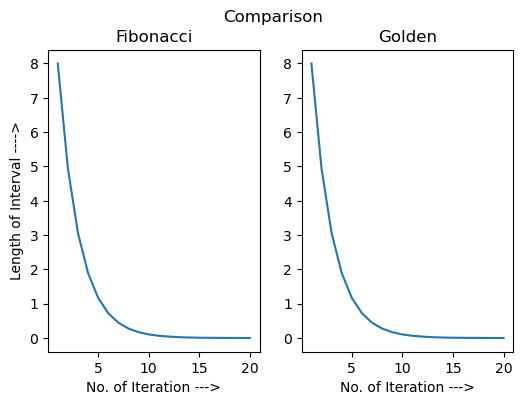

In [17]:
fibo_interval = np.abs(fibo_tab.a_k - fibo_tab.b_k)
golden_interval = np.abs(golden_tab.a_k - golden_tab.b_k)

fig, axes = plt.subplots(nrows = 1, ncols = 2, dpi = 100)

axes[0].plot(fibo_interval)
axes[0].set_xlabel("No. of Iteration --->")
axes[0].set_ylabel("Length of Interval ---->")
axes[0].set_title("Fibonacci")

axes[1].plot(golden_interval)
axes[1].set_xlabel("No. of Iteration --->")
axes[1].set_title("Golden")

fig.suptitle("Comparison")

plt.savefig("Comparison.png")

## Verification

In [18]:
verify_golden = scipy.optimize.minimize_scalar(fun = func, bracket = (left, right), method = "golden")
verify_golden.x

-0.9999999987444217

In [19]:
golden_tab.loc[20, "thi_l"]

-1.0

# Wolfe Condition

In [20]:
def obj_func(x):
    return (x[0])**2 + 2*x[0]*x[1] + (x[1])**2
def obj_grad(x):
    return [2*x[0]+2*x[1], 2*x[0]+2*x[1]]

In [21]:
search = np.array([1, 2])
direction = np.array([-1, -1])
c1 = 1 * 10^-4
c2 = 0.9
amax = 10
maxiter = 10
reduction = 0.5

In [22]:
wolfe_opt = scipy.optimize.line_search(obj_func, obj_grad, search, direction, c1 = c1, c2 = c2, amax = amax, maxiter = maxiter)
wolfe_opt

(1.0, 2, 1, 1.0, 9.0, [2.0, 2.0])

In [24]:
alpha = wolfe_opt[0]
optima = search + alpha*direction
print(f"Optima exists at {optima}")

Optima exists at [0. 1.]
